In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import ndcg_score, dcg_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
random_seed = 303

In [4]:
# input
fn_traning_set = '../data/intermediary/training_set.csv.gz'
fn_pairwise = '../data/intermediary/pairwise_training_set.csv.gz'

# output
table2 = f'../data/output/tables/table2.csv'

In [5]:
df = pd.read_csv(fn_traning_set, compression='gzip')

In [6]:
_df = df[
    (~df.stars.isnull()) & 
    (~df.reviews.isnull()) & 
    (df.is_sponsored == False) &
    (~df.is_sold_by_amazon.isnull()) &
    (~df.is_shipped_by_amazon.isnull()) &
    (~df.has_third_party_sellers.isnull()) &
    (~df.price.isnull())
]
len(_df)

176935

In [7]:
_df['price'] = _df.price.apply(lambda x: x.split(' ')[-1].lstrip("$") if x else None)
_df['price'] = _df['price'].str.replace(',', '').astype(float)

<ipython-input-7-14ad5d1093e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['price'] = _df.price.apply(lambda x: x.split(' ')[-1].lstrip("$") if x else None)
<ipython-input-7-14ad5d1093e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['price'] = _df['price'].str.replace(',', '').astype(float)


In [8]:
_df = _df.sort_values(by=['search_term', 'product_order']).drop_duplicates(subset=['search_term', 'asin'])

In [9]:
_df.loc[:, 'reviews_log'] = np.log(_df['reviews'])
_df.loc[:, 'stars_norm'] = _df['stars'] / 5
_df.loc[:, 'product_order_log'] =  np.log(_df['product_order'])
_df.loc[:, 'product_row'] = ( (_df['product_order'] // 4) + 1)


# for col in bool_cols:
#     _df.loc[:, col] = _df[col].astype(int)

In [10]:
_df['control'] = np.random.randn(len(_df))

In [17]:
# def lin_reg_ndcg_by_search_term(df, variable, target='score', k=None):
#     """Fits a linear regression and gets the NDCG score"""
#     is_multivariate = True if isinstance(variable, list) else False
    
#     terms_train, terms_test = train_test_split(df.search_term, random_state=303, test_size=.33)
#     df_train = df[df.search_term.isin(terms_train)]
#     df_test = df[df.search_term.isin(terms_test)]
    
#     X = df_train[variable]
#     y = df_train[target]
#     X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
#     X_train = X_2d
#     y_train = y
    
#     # fit the regression
#     linear_regression = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    
#     scores = []
#     for search_term, df_test_ in df_test.groupby('search_term'):
#         if len(df_test_) == 1: continue
#         X = df_test_[variable]
#         y = df_test_[target]
#         X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  

#         X_test = X_2d
#         y_test = y
#         y_pred = linear_regression.predict(X_test)

#         # evaluate
#         true_rank = np.array([y_test])
#         true_rank = np.argsort(true_rank)
        
#         pred_rank = np.array([y_pred])
#         pred_rank = np.argsort(pred_rank)

#         ndcg = ndcg_score(true_rank, pred_rank, k=k, ignore_ties=True)
# #         print(ndcg)
#         scores.append(ndcg)
    
#     return sum(scores) / len(scores)
# #     return len([_ for _ in scores if _ >= .70]) / len(scores)

In [36]:
# import math, random

# # Equations from https://en.wikipedia.org/wiki/Discounted_cumulative_gain

# def dcg(items, g):
#     # i + 2 instead of i + 1 because enumerate() starts at 0 instead of 1
#     return sum([g[item]/math.log(i + 2, 2) for i, item in enumerate(items)])
  
# def ndcg(reference, rerank, g):
#     return dcg(rerank, g)/dcg(reference, g)

In [102]:
# import statistics

In [107]:
# def lin_reg_ndcg_by_search_term(df, variable, target='score', k=None):
#     """Fits a linear regression and gets the NDCG score"""
#     is_multivariate = True if isinstance(variable, list) else False
    
#     terms_train, terms_test = train_test_split(df.search_term, random_state=303, test_size=.2)
#     df_train = df[df.search_term.isin(terms_train)]
#     df_test = df[df.search_term.isin(terms_test)]
    
#     X = df_train[variable]
#     y = df_train[target]
#     X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
#     X_train = X_2d
#     y_train = y
    
#     # fit the regression
#     linear_regression = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    
#     scores = []
#     for search_term, df_test_ in df_test.groupby('search_term'):
#         if len(df_test_) == 1: continue
#         X = df_test_[variable]
#         y = df_test_[target]
#         X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  

#         X_test = X_2d
#         y_test = y
#         y_pred = linear_regression.predict(X_test)

#         # evaluate
#         true_rank = np.array([y_test])
#         true_rank = np.argsort(true_rank)
        
#         pred_rank = np.array([y_pred])
#         pred_rank = np.argsort(pred_rank)
#         score = ndcg_score(true_rank, pred_rank, k=k, ignore_ties=False)
        
# #         ordered list
# #         df_test_ = df_test_.assign(product_order_pred = pred_rank)
# #         reference = df_test_.sample(frac=1).sort_values(by='product_order', ascending=True).index.tolist()
# #         g = {item: len(reference)-i for i, item in enumerate(reference)}
# #         rerank = df_test_.sample(frac=1).sort_values(by='product_order_pred', ascending=True).index.tolist()
# #         score = ndcg(reference, rerank, g)


#         scores.append(score)
    
#     return sum(scores) / len(scores)
# #     return statistics.median(scores)
# #     return len([_ for _ in scores if _ >= .70]) / len(scores)

In [93]:
# lin_reg_ndcg_by_search_term(_df, variable='control', target='product_order')

0.6118973866655671

In [94]:
# lin_reg_ndcg_by_search_term(_df, variable='is_amazon', target='product_order')

0.5090675399795374

In [96]:
# indep_vars = [
#     'stars', 
#     'reviews',
#     'is_sold_by_amazon', 
#     'is_shipped_by_amazon', 
#     'top_clicked',
#     'control'
# ]

# dep_var = 'product_order'

# # this is done on a subset of each dataframe
# # title2df = {
# #     'non-Amazon': _df[_df.is_amazon_product == False].sample(8000, random_state=303),
# #     'Amazon': _df[_df.is_amazon_product == True].sample(8000, random_state=303),
# #     'All products': _df.sample(100000, random_state=42),    
# # }

# title2df = {
#     'non-Amazon': _df[_df.is_amazon == False],
#     'Amazon': _df[_df.is_amazon == True],
#     'All products': _df,    
# }

In [108]:
# k = 20
# data = []
# for title, __df in title2df.items():
#     record = {
#         'dataset': f'{title} (N={len(__df):,})'
#     }
#     ndcg = lin_reg_ndcg_by_search_term(__df, variable=indep_vars, target=dep_var, k=k)
#     record['all factors'] = ndcg
    
#     for iv in indep_vars:
#         ndcg = lin_reg_ndcg_by_search_term(__df, variable=iv, target=dep_var, k=k)
#         record[iv] = ndcg
#     data.append(record)
    
# result = pd.DataFrame(data).set_index('dataset').T.round(4)
# result

dataset,"non-Amazon (N=142,997)","Amazon (N=12,413)","All products (N=155,410)"
all factors,0.6872,0.8310,0.6708
stars,0.6290,0.8564,0.6141
reviews,0.6910,0.8486,0.6757
is_sold_by_amazon,0.5650,0.9351,0.5434
is_shipped_by_amazon,0.5485,0.9491,0.5326
top_clicked,0.6026,0.9500,0.5873
control,0.6218,0.8077,0.6119


In [123]:
# k = 60
# data = []
# for title, __df in title2df.items():
#     record = {
#         'dataset': f'{title} (N={len(__df):,})'
#     }
#     ndcg = lin_reg_ndcg_by_search_term(__df, variable=indep_vars, target=dep_var, k=k)
#     record['all factors'] = ndcg
#     for iv in indep_vars:
#         ndcg = lin_reg_ndcg_by_search_term(__df, variable=iv, target=dep_var, k=k)
#         record[iv] = ndcg

#     data.append(record)
    
# result = pd.DataFrame(data).set_index('dataset').T.round(4)
# result

dataset,"non-Amazon (N=142,997)","Amazon (N=12,413)","All products (N=155,410)"
all factors,0.8553,0.8468,0.8553
stars_norm,0.8282,0.8587,0.8298
reviews_log,0.8542,0.8503,0.8543
is_sold_by_amazon,0.8318,0.9349,0.8258
is_shipped_by_amazon,0.8227,0.9458,0.8213
top_clicked,0.8406,0.9528,0.8415
control,0.8203,0.8101,0.8220


In [22]:
# def lin_reg_rsquared(df, variable, target='score'):
#     """Fits a linear regression and gets the R=sqaured"""
#     is_multivariate = True if isinstance(variable, list) else False   
#     X = df[variable]
#     y = df[target]
#     X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_2d, y, random_state=42, test_size=.3,
#     )
    
#     # fit the regression
#     linear_regression = LinearRegression(fit_intercept=False).fit(X_train, y_train)
#     rsquared = linear_regression.score(X_test, y_test)

#     del linear_regression
#     return rsquared

In [127]:
# indep_vars = [
#     'stars_norm', 
#     'reviews_log',
#     'is_sold_by_amazon', 
#     'is_shipped_by_amazon', 
#     'top_clicked',
#     'control'
# ]

# dep_var = 'product_order'

# title2df = {
#     'non-Amazon': _df[_df.is_amazon == False],
#     'Amazon': _df[_df.is_amazon == True],
#     'All products': _df,    
# }

# data = []
# for title, __df in title2df.items():
#     record = {
#         'dataset': f'{title} (N={len(__df):,})'
#     }
#     r2 = lin_reg_rsquared(__df, variable=indep_vars, target=dep_var)
#     record['all factors'] = r2
#     for iv in indep_vars:
#         r2 = lin_reg_rsquared(__df, variable=iv, target=dep_var)
#         record[iv] = r2

#     data.append(record)
    
# result_r2 = pd.DataFrame(data).set_index('dataset').T.round(4)
# result_r2

dataset,"non-Amazon (N=142,997)","Amazon (N=12,413)","All products (N=155,410)"
all factors,0.0025,0.0084,0.0048
stars_norm,-0.0249,-0.0123,-0.0238
reviews_log,-0.5346,-0.2456,-0.5286
is_sold_by_amazon,-2.4246,-0.4749,-2.2899
is_shipped_by_amazon,-0.6750,-0.3493,-0.6762
top_clicked,-2.0747,-1.4697,-2.0515
control,-3.3543,-2.3913,-3.3069


,asin,product_name,stars,reviews,brand,product_url,is_prime,is_fresh,is_sponsored,is_featured_brand,...,top_clicked,is_amazon,is_sold_by_amazon,is_shipped_by_amazon,has_third_party_sellers,reviews_log,stars_norm,product_order_log,product_row,control
174659,B06VVLD2GL,Amazon Basics #10 Security-Tinted Envelopes wi...,4.8,10210.0,NaN,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,True,False,False,True,...,1,True,False,True,True,9.231123,0.96,0.000000,1,-0.226968
174663,B01D0OANU4,#10 Security Tinted Self-Seal Envelopes - No W...,4.8,8556.0,NaN,/10-Security-Tinted-Self-Seal-Envelopes/dp/B01...,True,False,False,False,...,1,False,False,True,True,9.054388,0.96,1.609438,2,0.314797
174665,B07FK9PCZB,"Quality Park #10 Self-Seal Security Envelopes,...",4.8,11368.0,NaN,/Quality-Park-Self-Seal-Redi-Strip-QUA69117/dp...,False,False,False,False,...,1,False,True,True,True,9.338558,0.96,1.945910,2,0.760570
174666,B016V06OYS,"#10 Security Self-Seal Envelopes, Windowless D...",4.8,2635.0,NaN,/Security-SELF-Seal-Envelopes-Windowless-Quick...,True,False,False,False,...,1,False,False,True,True,7.876638,0.96,2.079442,3,-0.248360
174667,B000T9MP5U,"Mead No.10 Envelopes, Security, Press-it Seal-...",4.7,13399.0,NaN,/Mead-Envelopes-Security-Press-75026/dp/B000T9...,True,False,False,False,...,1,False,False,True,True,9.502935,0.94,2.197225,3,-0.812003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189146,B087H1N3D1,VITALDIN Melatonin Adult Gummies - Sleep Aid G...,4.4,75.0,NaN,/VITALDIN-Melatonin-Adult-Gummies-Serving/dp/B...,True,False,False,False,...,0,False,False,True,False,4.317488,0.88,3.891820,13,-0.098803
189147,B0872JVBKD,SMART FOR LIFE Melatonin Gummies W/Magnesium 5...,4.5,486.0,NaN,/SMART-LIFE-Melatonin-Gummies-Magnesium/dp/B08...,True,False,False,False,...,1,False,False,False,True,6.186209,0.90,3.912023,13,1.601755
189148,B0149LAJTW,"Natrol Melatonin Fast Dissolve Tablets, Helps ...",4.7,6728.0,NaN,/Natrol-Melatonin-Dissolve-Dissolves-Absorptio...,True,False,False,False,...,1,False,True,True,True,8.814033,0.94,3.931826,13,0.335902
189149,B00C3Q5JVE,"Natrol Melatonin Fast Dissolve Tablets, Helps ...",4.7,7516.0,NaN,/Natrol-Melatonin-Dissolves-Absorption-Strawbe...,True,False,False,False,...,1,False,True,True,True,8.924789,0.94,3.951244,14,-0.467294


In [128]:
# terms_train, terms_test = train_test_split(_df.search_term, random_state=303, test_size=.2)
# df_train = df[df.search_term.isin(terms_train)]
# df_test = df[df.search_term.isin(terms_test)]

In [83]:
_df.iloc[0]

asin                                                              B086VR2KY8
product_name               All-New Toshiba 50LF621U21 50-inch Smart 4K UH...
stars                                                                    4.6
reviews                                                                 5282
brand                                                                    NaN
product_url                /gp/slredirect/picassoRedirect.html/ref=pa_sp_...
is_prime                                                                True
is_fresh                                                               False
is_sponsored                                                           False
is_featured_brand                                                       True
is_amazons_choice                                                      False
is_best_seller                                                         False
product_order                                                              1

In [11]:
bool_cols = [
    'top_clicked',
    'is_sold_by_amazon', 
    'is_shipped_by_amazon', 
    'is_amazon', 
    'top_clicked',
    'is_best_seller',
    "is_amazons_choice"
]
bool2int = {True : 1, False : -1}
for col in bool_cols:
    _df.loc[:, col + '_encoded'] = _df[col].replace(bool2int)

In [9]:
# fn_pairwise = '../data/intermediary/pairwise_training_set_2021_5_10.csv.gz'

In [12]:
import random

In [13]:
random.random()

0.19296443233516225

In [10]:
# data_check = []
# for search_term, __df in tqdm(_df[_df.is_sponsored != True].groupby('search_term')):
#     # for each search term, go through each row.
#     if len(__df) == 1:
#         continue
#     __df.sort_values(by='product_order', inplace=True)
#     data_check.append(__df.iloc[0].to_dict())

  0%|          | 0/4526 [00:00<?, ?it/s]<ipython-input-10-077f16a363d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  __df.sort_values(by='product_order', inplace=True)
100%|██████████| 4526/4526 [00:03<00:00, 1477.18it/s]


In [51]:
# pd.DataFrame(data_check)['is_amazon'].value_counts()

False    3351
True     1173
Name: is_amazon, dtype: int64

In [61]:
# len(__df[__df.product_order == 1])

0

In [44]:
last_product_position = 2

In [15]:
# if not os.path.exists(fn_pairwise):
last_product_position = 2
random.seed(303)
data = []
for search_term, __df in tqdm(_df[_df.is_sponsored != True].groupby('search_term')):
    # for each search term, go through each row.
    if len(__df) == 1:
        continue
    if len(__df[__df.product_order == 1]) == 0:
        continue
    __df.sort_values(by='product_order', inplace=True)
    __df.reset_index(inplace=True)
    
    for i in range(1, last_product_position):
        if len(__df) <= i:
            continue
        if random.random() > .5:
            row = __df.iloc[0]
            comparison = __df.iloc[i]
        else:
            row = __df.iloc[i]
            comparison = __df.iloc[0]
    #     __df.so
        knockout = row['product_order']
    #     comparison = __df[__df.product_order != knockout].sample(1).iloc[0]

        # calculate differences between two pairs
        placed_higher = knockout > comparison['product_order']
        stars_delta = row['stars'] - comparison['stars']
        ratings_delta = row['reviews'] - comparison['reviews']
        stars_delta_perc = stars_delta / row['stars']
        ratings_delta_perc = ratings_delta / row['reviews']
        
        is_amazon = row['is_amazon_encoded'] - comparison['is_amazon_encoded']
        is_shipped_by_amazon = row['is_shipped_by_amazon_encoded'] - comparison['is_shipped_by_amazon_encoded']
        is_sold_by_amazon = row['is_sold_by_amazon_encoded'] - comparison['is_sold_by_amazon_encoded']
        is_top_clicked = row['top_clicked_encoded'] - comparison['top_clicked_encoded']
        is_best_seller = row['is_best_seller_encoded'] - comparison['is_best_seller_encoded']
        is_amazons_choice = row['is_amazons_choice_encoded'] - comparison['is_amazons_choice_encoded']
        random_noise = row['control'] - comparison['control']
        price_delta = row['price'] - comparison['price']
        price_delta_perc = (price_delta) / (row['price'] + .001)

        output = {
            'search_term' : search_term,
            'placed_higher' : placed_higher,
            'stars_delta': stars_delta,
            'reviews_delta' : ratings_delta,
            'price_delta': price_delta,
            'stars_delta_perc': stars_delta_perc,
            'reviews_delta_perc': ratings_delta_perc,
            'price_delta_perc': price_delta_perc,
            'is_shipped_by_amazon' : is_shipped_by_amazon,
            'is_sold_by_amazon': is_sold_by_amazon,
            'is_amazon': is_amazon,
            'is_top_clicked': is_top_clicked,
            'is_amazons_choice': is_amazons_choice,
            'is_best_seller': is_best_seller,
            'random_noise' : random_noise,
            'asin_1' : row['asin'],
            'asin_2': comparison['asin']
        }

        data.append(output)
    training_data = pd.DataFrame(data)
#     training_data.to_csv(fn_pairwise, index=False, compression='gzip')

# else:
#     training_data = pd.read_csv(fn_pairwise, compression='gzip')

  0%|          | 0/4525 [00:00<?, ?it/s]<ipython-input-15-658fa195bde6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  __df.sort_values(by='product_order', inplace=True)
100%|██████████| 4525/4525 [00:10<00:00, 418.61it/s]


In [16]:
len(training_data)

1667

In [48]:
training_data

,search_term,placed_higher,stars_delta,reviews_delta,is_shipped_by_amazon,is_sold_by_amazon,is_amazon,is_top_clicked,is_amazons_choice,is_best_seller,random_noise,price_difference,asin_1,asin_2
0,#10 envelope,True,0.0,-1654.0,0,0,-2,0,0,2,0.248205,-11.00,B01D0OANU4,B06VVLD2GL
1,#6 envelope,False,0.1,7844.0,0,0,2,2,0,0,0.539421,-6.12,B06X15WSLL,B07JNXMBSX
2,1 inch binder,True,0.0,-9383.0,0,2,-2,0,2,-2,-0.688909,10.72,B00A45VF2S,B01BRGTWOA
3,1% milk,False,0.0,183.0,0,0,0,2,0,0,-0.660239,1.10,B07WC9MMPD,B07W5Z8SJ8
4,10 dollar gifts,False,0.8,75410.0,-2,0,0,0,0,-2,-0.350984,0.01,B00F4CEHNK,B07FCNYND8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,zwave hub,False,0.8,848.0,0,0,0,2,0,0,-2.192503,98.00,B07D19VVTX,B077Y939JQ
1663,zxzy womens hoodies,False,-0.1,6.0,0,0,0,0,0,0,0.923685,8.00,B08F7RFZGP,B08KT3BD2X
1664,zyliss knives,True,0.0,-3010.0,0,0,0,0,-2,0,0.095042,-8.00,B0753SKVZX,B01DKEB5OC
1665,zyrtec for kids,False,-0.2,2184.0,2,0,0,0,2,0,-1.782325,3.54,B004E0QGOQ,B088X7151W


In [17]:
x, y = train_test_split(training_data, test_size=.2)
len(x), len(y)

(1333, 334)

In [16]:
training_data.iloc[0]

search_term             #10 envelope
placed_higher                   True
stars_delta                        0
reviews_delta                  -1654
is_shipped_by_amazon               0
is_sold_by_amazon                  0
is_amazon                         -2
is_top_clicked                     0
is_amazons_choice                  0
is_best_seller                     2
random_noise               -0.882479
asin_1                    B01D0OANU4
asin_2                    B06VVLD2GL
Name: 0, dtype: object

In [12]:
# # if not os.path.exists(fn_pairwise):
# data = []
# for search_term, __df in tqdm(_df[_df.is_sponsored != True].groupby('search_term')):
#     # for each search term, go through each row.
#     for j, row in __df.iterrows():
#         if len(__df) == 1:
#             continue
#         # pick a random pair from the same list
#         knockout = row['product_order']
#         comparison = __df[__df.product_order != knockout].sample(1).iloc[0]

#         # calculate differences between two pairs
#         placed_higher = knockout > comparison['product_order']
#         stars_delta = row['stars'] - comparison['stars']
#         ratings_delta = row['reviews'] - comparison['reviews']
#         is_amazon = row['is_amazon_encoded'] - comparison['is_amazon_encoded']
#         is_shipped_by_amazon = row['is_shipped_by_amazon_encoded'] - comparison['is_shipped_by_amazon_encoded']
#         is_sold_by_amazon = row['is_sold_by_amazon_encoded'] - comparison['is_sold_by_amazon_encoded']
#         is_top_clicked = row['top_clicked_encoded'] - comparison['top_clicked_encoded']
#         is_best_seller = row['is_best_seller_encoded'] - comparison['is_best_seller_encoded']
#         is_amazons_choice = row['is_amazons_choice_encoded'] - comparison['is_amazons_choice_encoded']
#         random_noise = row['control'] - comparison['control']

#         output = {
#             'search_term' : search_term,
#             'placed_higher' : placed_higher,
#             'stars_delta': stars_delta,
#             'ratings_delta' : ratings_delta,
#             'is_shipped_by_amazon' : is_shipped_by_amazon,
#             'is_sold_by_amazon': is_sold_by_amazon,
#             'is_amazon': is_amazon,
#             'is_top_clicked': is_top_clicked,
#             'is_amazons_choice': is_amazons_choice,
#             'is_best_seller': is_best_seller,
#             'random_noise' : random_noise,
#             'asin_1' : row['asin'],
#             'asin_2': comparison['asin']
#         }

#         data.append(output)
# training_data = pd.DataFrame(data)
# training_data.to_csv(fn_pairwise, index=False, compression='gzip')

# # else:
# #     training_data = pd.read_csv(fn_pairwise, compression='gzip')

100%|██████████| 4526/4526 [03:17<00:00, 22.93it/s]


In [18]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier

In [28]:
# logreg = LogisticRegression(C=1, random_state=303)

In [19]:
from sklearn.model_selection import cross_val_score

In [71]:
def fit_model_cv(df, variable, 
              target, model, cv=10):
    """Fits a model and gets accuracy"""
    is_multivariate = True if isinstance(variable, list) else False   
    X = df[variable]
    y = df[target]
    X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_2d, y, random_state=random_seed, test_size=.2,
    )
    
    # fit the regression
#     linear_regression = model.fit(X_train, y_train)
#     accuracy = linear_regression.score(X_test, y_test)  
    scores = cross_val_score(model, X, y, cv=cv)
    accuracy = scores.mean()
    std = scores.std()
    return accuracy, std

In [48]:
def fit_model(df, variable, 
              target, model, cv=10):
    """Fits a model and gets accuracy"""
    is_multivariate = True if isinstance(variable, list) else False   
    X = df[variable]
    y = df[target]
    X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_2d, y, random_state=random_seed, test_size=.2,
    )
    model.fit(X_train, y_train)

In [21]:
def fit_model(df, variable, 
              target, model):
    """Fits a model and gets accuracy"""
    is_multivariate = True if isinstance(variable, list) else False   
    X = df[variable]
    y = df[target]
    X_2d = X if is_multivariate else np.expand_dims(X.values, axis=1)  
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_2d, y, random_state=random_seed, test_size=.2,
    )
    
    # fit the regression
    linear_regression = model.fit(X_train, y_train)
    accuracy, std = linear_regression.score(X_test, y_test)
    
    return accuracy

In [21]:
len(training_data) * .25

340.0

In [22]:
training_data.placed_higher.value_counts(normalize=True)

True     0.511765
False    0.488235
Name: placed_higher, dtype: float64

In [23]:
cols = ['stars_delta', 'reviews_delta',
        'is_amazon',
       'is_shipped_by_amazon', 'is_sold_by_amazon', 
        'is_top_clicked',
        'random_noise']

# cols = ['stars_delta', 'reviews_delta',
#         'price_delta','stars_delta_perc', 'reviews_delta_perc', 'price_delta_perc',
#         'is_amazon',
#        'is_shipped_by_amazon', 'is_sold_by_amazon', 
#         'is_top_clicked',
#         'random_noise']

target = 'placed_higher'

## Making the cut
When we try to predict which item was placed above another (randomly selected) item from the same search page, we were only able to slightly out-perform a coin flip.

When we looked at the differences in star ratings and number of reviewers, along with whether the product was highly clicked in the past, a randomly generated number, or whether the product was sold, shipped, or Amazon itself, our logisitic regression model only picked correctly 57.37 percent of the time.

When we systematically re-evaluated the model with individual features knocked out, the model was only slightly worse after removing ratings (56.16 percent accuracy). 

Oddly enough, the model also performs slightly worse when we knocked out a randomly generated number used as a control feature and point of reference.

This suggests that there is little-to-no correlation between which items get placed above one another and performance metrics like star ratings and the number of reviews.

This regression only uses features that are available to third parties, it does not include many of the fields accessible to Amazon including sales, clicks, or user histories.

In [34]:
forest = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=303)
score = fit_model_cv(training_data, variable=cols, target=target, model=forest)

In [35]:
score

0.7410059171597634

In [72]:
cat2performance = {}

forest = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=7, random_state=303)
score, std = fit_model_cv(training_data, variable=cols, target=target, model=forest)
print(f"All features (n_test = {int(len(training_data) * .2):,}): {score * 100 :.4}%")
cat2performance["All Features"] = score
for col in cols:
    clf =  RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=7, random_state=303)
    iv = [c for c in cols if c not in col]
    score, std = fit_model_cv(training_data, variable=iv, target=target, model=clf)
    print(f"without {col}: {score * 100 :.4}% +/- {std * 100 :.4}")
    cat2performance[f"without {col}"] = score

All features (n_test = 333): 75.82%
without stars_delta: 74.99% +/- 2.713
without reviews_delta: 73.12% +/- 2.569
without is_amazon: 64.55% +/- 2.264
without is_shipped_by_amazon: 75.29% +/- 2.454
without is_sold_by_amazon: 75.23% +/- 2.576
without is_top_clicked: 76.19% +/- 2.356
without random_noise: 75.47% +/- 2.537


In [152]:
# cat2performance = {}

# forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
# score = fit_model(training_data, variable=cols, target=target, model=forest)
# print(f"All features (n_test = {int(len(training_data) * .2):,}): {score * 100 :.4}%")
# cat2performance["All Features"] = score
# for col in cols:
#     clf =  RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
#     iv = [c for c in cols if c not in col]
#     score = fit_model(training_data, variable=iv, target=target, model=clf)
#     print(f"without {col}: {score * 100 :.4}%")
#     cat2performance[f"without {col}"] = score

All features (n_test = 333): 71.26%
without stars_delta: 73.05%
without reviews_delta: 69.76%
without price_delta: 70.96%
without stars_delta_perc: 70.96%
without reviews_delta_perc: 72.46%
without price_delta_perc: 71.26%
without is_amazon: 61.68%
without is_shipped_by_amazon: 71.56%
without is_sold_by_amazon: 72.75%
without is_top_clicked: 71.26%
without random_noise: 71.56%


In [69]:
def get_performance(cat2performance):
    perf = pd.DataFrame([
        {"Feature": k, "Accuracy" :v} for k, v in cat2performance.items()
    ])
    
    perf['Change of Accuracy'] = perf['Accuracy'].apply(lambda x: x - perf['Accuracy'].iloc[0]) * 100
    perf['Change of Accuracy_'] = perf['Accuracy'].apply(lambda x: 
                                                         round(abs(x - perf['Accuracy'].iloc[0]), 2)) * 100
                                                        
    perf.sort_values(by=['Change of Accuracy_', 'Feature'], ascending=False, inplace=True)
        
    return perf.style.format({
        'var1': '{:,.2f}'.format,
        'Accuracy': '{:,.1%}'.format,
        'Change of Accuracy': '{:.1f}'.format,
    })

In [70]:
get_performance(cat2performance)

,Feature,Accuracy,Change of Accuracy,Change of Accuracy_
3,without is_amazon,64.5%,-11.3,11.000000
2,without reviews_delta,73.1%,-2.7,3.000000
1,without stars_delta,75.0%,-0.8,1.000000
5,without is_sold_by_amazon,75.2%,-0.6,1.000000
4,without is_shipped_by_amazon,75.3%,-0.5,1.000000
7,without random_noise,75.5%,-0.4,0.000000
6,without is_top_clicked,76.2%,0.4,0.000000
0,All Features,75.8%,0.0,0.000000


In [42]:
cat2performance_standalone = {}

for col in cols:
    clf =  RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=7, random_state=303)
    score = fit_model_cv(training_data, variable=[col], target=target, model=clf)
    print(f"with just {col}: {score * 100 :.4}%")
    cat2performance_standalone[f"with just {col}"] = score

with just stars_delta: 52.97%
with just reviews_delta: 53.39%
with just is_amazon: 72.17%
with just is_shipped_by_amazon: 53.69%
with just is_sold_by_amazon: 58.49%
with just is_top_clicked: 56.63%
with just random_noise: 47.45%


In [43]:
get_performance(cat2performance_standalone)

,Feature,Accuracy,Change of Accuracy
6,with just random_noise,47.5%,-5.5
0,with just stars_delta,53.0%,0.0
1,with just reviews_delta,53.4%,0.4
3,with just is_shipped_by_amazon,53.7%,0.7
5,with just is_top_clicked,56.6%,3.7
4,with just is_sold_by_amazon,58.5%,5.5
2,with just is_amazon,72.2%,19.2


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
random_seed = 303

In [31]:
parameters = {'n_estimators':(100, 300, 500), 'max_depth':[3,5,7,9], 'random_state':[random_seed]}

In [32]:
forest = RandomForestClassifier()

In [33]:
grid = GridSearchCV(forest, parameters, n_jobs=-1, cv=5)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(training_data[cols],
                                                    training_data[target],
                                                    test_size=.25, random_state=random_seed)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [35]:
grid.score(X_test, y_test)

0.7314148681055156

In [36]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 300, 'random_state': 303}

In [37]:
grid.best_score_

0.7584

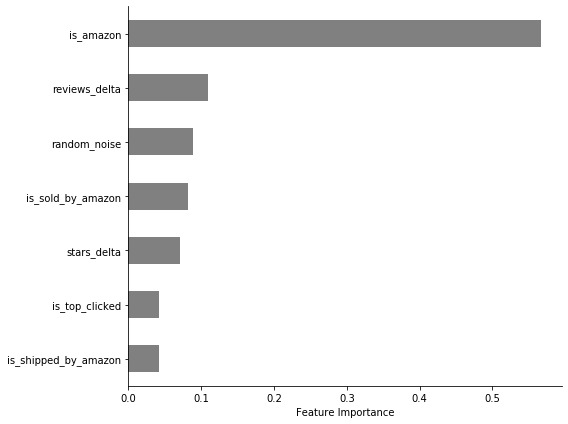

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=7, random_state=303)
score = fit_model(training_data, variable=cols, target=target, model=forest)

feature_names = cols
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(inplace=True, ascending=True)

fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.barh(ax=ax, color='grey')
# ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom') # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()

Figure Tk: Feature importance is a measure of how predictive a feature is among all the decisions trees we trained in the random forest model. Each feature is rated between 0 (not used at all) and 1 (perfectly predicts the which product gets placed higher).

0 means they are both X
-2 means they are both NOT X
2 means one is X and one is NOT X

In [166]:
training_data['is_amazon'].value_counts(normalize=True)

 0    0.486465
 2    0.257787
-2    0.255748
Name: is_amazon, dtype: float64

In [167]:
training_data['is_shipped_by_amazon'].value_counts(normalize=True)

 0    0.706770
 2    0.147393
-2    0.145837
Name: is_shipped_by_amazon, dtype: float64

In [168]:
training_data['is_sold_by_amazon'].value_counts(normalize=True)

 0    0.536012
 2    0.232663
-2    0.231325
Name: is_sold_by_amazon, dtype: float64

In [169]:
training_data['is_best_seller'].value_counts(normalize=True)

 0    0.844497
-2    0.078748
 2    0.076755
Name: is_best_seller, dtype: float64

In [170]:
training_data['is_top_clicked'].value_counts(normalize=True)

 0    0.609016
-2    0.196006
 2    0.194978
Name: is_top_clicked, dtype: float64

In [171]:
training_data['is_amazons_choice'].value_counts(normalize=True)

 0    0.882835
 2    0.060038
-2    0.057127
Name: is_amazons_choice, dtype: float64

In [164]:
# if not os.path.exists(fn_pairwise):
last_product_position = 60
random.seed(303)
data = []
for search_term, __df in tqdm(_df[_df.is_sponsored != True].groupby('search_term')):
    # for each search term, go through each row.
    if len(__df) == 1:
        continue
    if len(__df[__df.product_order == 1]) == 0:
        continue
    __df.sort_values(by='product_order', inplace=True)
    __df.reset_index(inplace=True)
    
    for i in range(1, last_product_position):
        if len(__df) <= i:
            continue
        if random.random() > .5:
            row = __df.iloc[0]
            comparison = __df.iloc[i]
        else:
            row = __df.iloc[i]
            comparison = __df.iloc[0]
    #     __df.so
        knockout = row['product_order']
    #     comparison = __df[__df.product_order != knockout].sample(1).iloc[0]

        # calculate differences between two pairs
        placed_higher = knockout > comparison['product_order']
        stars_delta = row['stars'] - comparison['stars']
        ratings_delta = row['reviews'] - comparison['reviews']
        stars_delta_perc = stars_delta / row['stars']
        ratings_delta_perc = ratings_delta / row['reviews']
        
        is_amazon = row['is_amazon_encoded'] - comparison['is_amazon_encoded']
        is_shipped_by_amazon = row['is_shipped_by_amazon_encoded'] - comparison['is_shipped_by_amazon_encoded']
        is_sold_by_amazon = row['is_sold_by_amazon_encoded'] - comparison['is_sold_by_amazon_encoded']
        is_top_clicked = row['top_clicked_encoded'] - comparison['top_clicked_encoded']
        is_best_seller = row['is_best_seller_encoded'] - comparison['is_best_seller_encoded']
        is_amazons_choice = row['is_amazons_choice_encoded'] - comparison['is_amazons_choice_encoded']
        random_noise = row['control'] - comparison['control']
        price_delta = row['price'] - comparison['price']
        price_delta_perc = (price_delta) / (row['price'] + .001)

        output = {
            'search_term' : search_term,
            'placed_higher' : placed_higher,
            'stars_delta': stars_delta,
            'reviews_delta' : ratings_delta,
            'price_delta': price_delta,
            'stars_delta_perc': stars_delta_perc,
            'reviews_delta_perc': ratings_delta_perc,
            'price_delta_perc': price_difference,
            'is_shipped_by_amazon' : is_shipped_by_amazon,
            'is_sold_by_amazon': is_sold_by_amazon,
            'is_amazon': is_amazon,
            'is_top_clicked': is_top_clicked,
            'is_amazons_choice': is_amazons_choice,
            'is_best_seller': is_best_seller,
            'random_noise' : random_noise,
            'asin_1' : row['asin'],
            'asin_2': comparison['asin']
        }

        data.append(output)
    training_data = pd.DataFrame(data)

  0%|          | 0/4525 [00:00<?, ?it/s]<ipython-input-164-5cf45a22376c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  __df.sort_values(by='product_order', inplace=True)
100%|██████████| 4525/4525 [04:18<00:00, 17.48it/s]


In [161]:
cat2performance = {}

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
score = fit_model(training_data, variable=cols, target=target, model=forest)
print(f"All features (n_test = {int(len(training_data) * .2):,}): {score * 100 :.4}%")
cat2performance["All Features"] = score
for col in cols:
    clf =  RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
    iv = [c for c in cols if c not in col]
    score = fit_model(training_data, variable=iv, target=target, model=clf)
    print(f"without {col}: {score * 100 :.4}%")
    cat2performance[f"without {col}"] = score

All features (n_test = 9,004): 79.58%
without stars_delta: 79.47%
without reviews_delta: 79.53%
without price_delta: 79.33%
without stars_delta_perc: 79.58%
without reviews_delta_perc: 77.99%
without price_delta_perc: 79.48%
without is_amazon: 71.96%
without is_shipped_by_amazon: 79.3%
without is_sold_by_amazon: 79.43%
without is_top_clicked: 78.9%
without random_noise: 79.82%


In [165]:
cat2performance_60 = {}

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
score = fit_model(training_data, variable=cols, target=target, model=forest)
print(f"All features (n_test = {int(len(training_data) * .2):,}): {score * 100 :.4}%")
cat2performance_60["All Features"] = score
for col in cols:
    clf =  RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=9, random_state=303)
    iv = [c for c in cols if c not in col]
    score = fit_model(training_data, variable=iv, target=target, model=clf)
    print(f"without {col}: {score * 100 :.4}%")
    cat2performance_60[f"without {col}"] = score

All features (n_test = 12,848): 80.78%
without stars_delta: 80.85%
without reviews_delta: 80.76%
without price_delta: 80.69%
without stars_delta_perc: 81.03%
without reviews_delta_perc: 79.61%
without price_delta_perc: 80.75%
without is_amazon: 73.34%
without is_shipped_by_amazon: 80.19%
without is_sold_by_amazon: 80.5%
without is_top_clicked: 80.08%
without random_noise: 80.88%


In [73]:
cols

['stars_delta',
 'reviews_delta',
 'is_amazon',
 'is_shipped_by_amazon',
 'is_sold_by_amazon',
 'is_top_clicked',
 'random_noise']

In [131]:
cols = ['stars_delta', 'reviews_delta',
        'is_amazon','is_shipped_by_amazon', 'is_sold_by_amazon', 
        'is_top_clicked','random_noise']

permutations = [cols]
for col in cols:
    p1 = [c for c in cols if c != col]
    permutations.append(sorted(p1))
    for col in p1:
        p2 = [c for c in p1 if c!= col]
        permutations.append(sorted(p2))
        for col in p2:
            p3 = [c for c in p2 if c!= col]
            permutations.append(sorted(p3))
            for col in p3:
                p4 = [c for c in p3 if c!= col]
                permutations.append(sorted(p4))
                for col in p4:
                    p5 = [c for c in p4 if c!= col]
                    permutations.append(sorted(p5))
                    for col in p5:
                        p6 = [c for c in p5 if c!= col]
                        permutations.append(p6)
                        
perms = list(set(tuple(row) for row in permutations))

In [132]:
len(permutations)

8660

In [104]:
6*7 + 5*7 + 4*7 + 3*7 + 2*7 + 1

141

In [134]:
len(perms)

127

In [114]:
list(iv)

['reviews_delta', 'is_shipped_by_amazon', 'random_noise']

In [116]:
cat2performance = {}
for iv in tqdm(perms):
    clf =  RandomForestClassifier(n_estimators=300, max_depth=7, 
                                  n_jobs=-1, random_state=303)
    score, std = fit_model_cv(training_data, variable=list(iv), 
                              target=target, model=clf)
    cat2performance[iv] = score

100%|██████████| 127/127 [06:00<00:00,  2.84s/it]


In [120]:
df = pd.DataFrame([{"cols" : k, "accuracy": v } for k, v in cat2performance.items()])

In [122]:
df.sort_values("accuracy", ascending=True).head(10)

,cols,accuracy
40,"(random_noise,)",0.474515
27,"(reviews_delta, random_noise)",0.496097
74,"(is_shipped_by_amazon, random_noise)",0.496696
66,"(stars_delta, random_noise)",0.527902
100,"(stars_delta,)",0.529702
82,"(reviews_delta,)",0.533948
88,"(stars_delta, reviews_delta, random_noise)",0.535676
45,"(is_shipped_by_amazon,)",0.536862
0,"(reviews_delta, is_shipped_by_amazon, random_n...",0.540484
106,"(stars_delta, reviews_delta)",0.541700


In [123]:
df.sort_values("accuracy", ascending=False).head(10)

,cols,accuracy
113,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.761857
35,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.758239
8,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.754679
18,"(stars_delta, reviews_delta, is_amazon, is_sol...",0.754661
117,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.754094
126,"(stars_delta, reviews_delta, is_amazon, is_sol...",0.752879
51,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.752265
68,"(stars_delta, reviews_delta, is_amazon, is_shi...",0.751688
84,"(stars_delta, reviews_delta, is_amazon, is_top...",0.750465
57,"(reviews_delta, is_amazon, is_shipped_by_amazo...",0.749888


In [130]:
1+2**6

65

In [126]:
df.sort_values("accuracy", inplace=True)

In [127]:
df.to_csv('../data/output/tables/random_forest_permutations.csv')

In [125]:
df.sort_values("accuracy", ascending=False).head(10).cols.tolist()

[('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_shipped_by_amazon',
  'is_sold_by_amazon',
  'random_noise'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_shipped_by_amazon',
  'is_sold_by_amazon',
  'is_top_clicked',
  'random_noise'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_shipped_by_amazon',
  'is_sold_by_amazon',
  'is_top_clicked'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_sold_by_amazon',
  'random_noise'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_shipped_by_amazon',
  'is_top_clicked'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_sold_by_amazon',
  'is_top_clicked',
  'random_noise'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_shipped_by_amazon',
  'is_top_clicked',
  'random_noise'),
 ('stars_delta', 'reviews_delta', 'is_amazon', 'is_shipped_by_amazon'),
 ('stars_delta',
  'reviews_delta',
  'is_amazon',
  'is_top_clicked',
  'random_noise'),
 ('reviews_delta',
  'is_amazon',
  'is